# Exercise set 2

> This exercise aims to investigate Bayes’ theorem and to use ANOVA to determine if a certain factor is indeed affecting the results of an experiment.

## Exercise 2.1 Bayes' theorem

A particular disease occurs randomly in the general population with a probability of $\tfrac{1}{10\,000}$.
A test has been developed for this disease which is $99\%$ correct, meaning here
that if a person has the disease, then the test will correctly be positive in $99\%$ of the cases.
If a person does not have the disease, the test will correctly be negative in $99\%$ of the cases.

### 2.1(a)
Assume that we are testing for this disease in a population of $1\,000\,000$ people. How many
are expected to have the disease? How many are expected to not
have the disease? Further:

- (i)  How many people with the disease will have a positive test?

- (ii)  How many people with the disease will have a negative test?

- (iii)  How many people without the disease will have a positive test? 

- (iv)  How many people without the disease will have a negative test? 


Summarize your answers to the four points above in a table of the following
form:

|               |          |     |Has the disease?|
|:--------------|:---------|:---:|:--------------:|
|               |          |Yes  |No              |
|**Test result**| Positive |     |                |
|               | Negative |     |                |



In [1]:
# Your code here
population = 1000000
probability_disease = 1/10000
probability_test_correct = 0.99

people_with_disease = population * probability_disease
people_without_disease = population - people_with_disease

people_with_disease_positive = people_with_disease * probability_test_correct
people_with_disease_negative = people_with_disease - people_with_disease_positive

people_without_disease_negative = people_without_disease * probability_test_correct
people_without_disease_positive = people_without_disease - people_without_disease_negative

print(f"People with disease: {people_with_disease}")
print(f"People without disease: {people_without_disease}")
print(f"(i) People with disease and positive test: {people_with_disease_positive}")
print(f"(ii) People with disease and negative test: {people_with_disease_negative}")
print(f"(iii) People without disease and positive test: {people_without_disease_positive}")
print(f"(iv) People without disease and negative test: {people_without_disease_negative}")

People with disease: 100.0
People without disease: 999900.0
(i) People with disease and positive test: 99.0
(ii) People with disease and negative test: 1.0
(iii) People without disease and positive test: 9999.0
(iv) People without disease and negative test: 989901.0


#### Your answer to question 2.1(a):

If the probability of the disease occurring is $\tfrac{1}{10\,000}$, then we expect that
$1\,000\,000 \times \tfrac{1}{10\,000} = 100$ will have the disease.
Further, $1\,000\,000 \times \left(1- \tfrac{1}{10\,000} \right) = 999\,900$ will
not have the disease.

* (i)  How many people with the disease will have a positive test?
  
  Of the $100$ people with the disease, the test is correct for $99\%$ of them: 
  $100 \times 0.99 = 99$ persons.


* (ii)  How many people with the disease will have a negative test?
  
  Of the $100$ people with
  the disease, the test is incorrect for $1\%$ of them: $100 \times 0.01 = 1$ person.
  
  
* (iii) How many people without the disease will have a positive test? 
  
  Of the $999\,900$ people
  without the disease, the test will be positive (incorrect) for $1\%$ of them:
  $999\,900 \times 0.01 = 9\,999$ persons.


* (iv)  How many people without the disease will have a negative test? 

  Of the $999\,900$ people
  without the disease, the test will be negative for $99\%$ of them:
  $999\,900 \times 0.99 = 989\,901$ persons.


Summarized:

<!--- This is needed for the coloring in jupyter notebook --->

|    |    ||Has the disease?|
|:---|:---|:---:|:---:|
|||Yes|No|
|**Test result**| Positive |99 | <span style="color:#1b9e77;">&nbsp;&nbsp;9999&nbsp;&nbsp;</span> |
|| Negative |<span style="color:#d95f02;" >1</span>|<span style="color:#7570b3;">989901</span>|



### 2.1(b)
Later in the course, when dealing with classification problems,
we will refer to this table as the "confusion matrix". This table
summarizes the types of errors we are making: the number of
false positives ("FP") and false negatives ("FN").
In addition, it shows us the number
of true positives
("TP") and true negatives ("TN").
Identify the location of
these $4$ labels in the table above. 
Using these labels, we can define different metrics that tell us
something about the performance of the test. One example of such a
measure is the [precision](https://en.wikipedia.org/wiki/Precision_and_recall) which is
defined as the ratio between the number of true positives and
the total number of positives:

\begin{equation}
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\tag{1}\end{equation}

We can interpret the precision as the probability of having the
disease, given that the test was positive.
Calculate this probability, using the formula given above.
Do you have any comments about the size of
this probability?




In [2]:
TP = 99
FP = 9999
precision = TP / (TP + FP)
print(f"precision = {precision:.4f}")

precision = 0.0098


#### Your answer to question 2.1(b):

In the table in the answer for **2.1 (a)**, the number of true positives is colored black, the
number of false positives is colored green, number of false negatives is
colored orange and number of true negatives is colored purple.
Here, the number of true positives is $TP=99$, and the number of
false positives is $FP=9999$. The precision is then (from the cell above) 0.0098.

Given that the test result is positive, the probability of having the disease is
less than $1\%$. This probability is quite low and is due to the large number
of false positives we get in this test, and the fact that the disease is rare
(it occurs in $\tfrac{1}{10\,000}$ of the population). If we were to improve
this probability, we would focus on lowering the number of false positives produced
by the test.

### 2.1(c)
Use Bayes theorem to calculate the probability of
having the disease, given that a test was positive. Compare
this to the probability you found in the previous answer.

In [3]:
# A is positive test
# B is person has disease
P_AB = 0.99  # P(A|B) chance that the test is correctly positive
P_B = 1 / 10_000  # P(B) chance that anyone has the disease
P_AnB = 1 - P_AB  # Chance of false positive (positive| not disease)
P_nB = 1 - P_B  # Chance that a person does not have the disease
P_A = P_AB * P_B + P_AnB * P_nB  # P(A) probability that any test is positive
P_BA = P_AB * P_B / P_A
print(f"P(B|A) = {P_BA:.4f}")

P(B|A) = 0.0098


#### Your answer to question 2.1(c):

To use Bayes theorem to calculate the probability of
    having the disease, given that a test was positive, we first define
    two events:
    
* A: test is positive,
* B: person has the disease,

so that the probability we are looking for is $P(B | A)$. Using Bayes theorem, this can
be expressed as,

\begin{equation}
    P(B | A) = \frac{P(A | B) \times P(B)}{P(A)} ,
    \end{equation}
    were $P(A | B) = 0.99$ and $P(B) = \tfrac{1}{10\,000}$. Further, we find $P(A)$ as,

\begin{equation}
    \begin{split}
    P(A) &= P(A | B) \times P(B) + P(A|\overline{B}) \times P(\overline{B}) \\
         &= 0.99 \times \frac{1}{10\,000} + 0.01 \times \frac{9\,999}{10\,000} = 
        \frac{10\,098}{1\,000\,000}.
    \end{split}
\end{equation}
    
    
The probability $P(B | A)$ is then,
\begin{equation}
    P(B | A) = \frac{P(A | B) \times P(B)}{P(A)} = \frac{0.99 \times \tfrac{1}{10\,000}}{\tfrac{10\,098}{1\,000\,000}} = \frac{99}{10\,098} = 0.0098.
\end{equation}
This is implemented in the cell above and identical to the precision we found for **2.1 (b)**, as expected.

## Exercise 2.2

The fertilizer magnesium ammonium phosphate MgNH$_4$PO$_4$ is an effective
supplier of nutrients necessary for plant growth. In an experiment, you have
tested the effect of this fertilizer on the growth of Chrysanthemums by
measuring the height of the plants after growing them for four weeks.
You have considered $4$ different concentrations of the fertilizer (measured in g/bu)
and you have measured the mean height by growing $10$ plants per concentration.
The measured data is given in Table 1, and is
also given in the file [`Data/fertilizer.txt`](Data/fertilizer.txt).


|**50 g/bu** | **100 g/bu** | **200 g/bu** | **400 g/bu** |
|:---:|:---:|:---:|:---:|
|$13.2$ | $16.0$ | $ 7.8$ | $21.0$ |
|$12.4$ | $12.6$ | $14.4$ | $14.8$ |
|$12.8$ | $14.8$ | $20.0$ | $19.1$ |
|$17.2$ | $13.0$ | $15.8$ | $15.8$ |
|$13.0$ | $14.0$ | $17.0$ | $18.0$ |
|$14.0$ | $23.6$ | $27.0$ | $26.0$ |
|$14.2$ | $14.0$ | $19.6$ | $21.1$ |
|$21.6$ | $17.0$ | $18.0$ | $22.0$ |
|$15.0$ | $22.2$ | $20.2$ | $25.0$ |
|$20.0$ | $24.4$ | $23.2$ | $18.2$ |


**Table 1:** *Measured plant heights (in cm) as a function of the fertilizer concentration (in g/bu).*

### 2.2(a)
Here, we will test the hypothesis that the mean height
of the plants is not affected by the amount of fertilizer. We
are going to test this with a specified significance level, $\alpha$.
What is the meaning of $\alpha$ in connection with a hypothesis test?

#### Your answer to question 2.2(a):

The significance level, $\alpha$, is the probability of rejecting
the null hypothesis (in this case that all the means are equal) when
the null hypothesis is true. If we set this value to $0.05$, this
means that it should be no more than a $5$\% chance of
erroneously concluding that the null hypothesis is false when it is
true.

### 2.2(b)
To test the hypothesis, we will perform ANOVA. Before we do that,
it is a good idea to visualize the raw data. Create a suitable plot
of the raw data. Does it look like our hypothesis is correct?

In [4]:
# Here is some code to get you started:
import pandas as pd  # For reading the data
from matplotlib import pyplot as plt  # For plotting
import seaborn as sns  # More plotting

sns.set_context("notebook")  # Style plots for a Jupyter notebook

data = pd.read_csv("Data/fertilizer.txt")  # Read the data

In [5]:
data  # Just show the data table

,50 g/bu,100 g/bu,200 g/bu,400 g/bu
0,13.2,16.0,7.8,21.0
1,12.4,12.6,14.4,14.8
2,12.8,14.8,20.0,19.1
3,17.2,13.0,15.8,15.8
4,13.0,14.0,17.0,18.0
5,14.0,23.6,27.0,26.0
6,14.2,14.0,19.6,21.1
7,21.6,17.0,18.0,22.0
8,15.0,22.2,20.2,25.0
9,20.0,24.4,23.2,18.2


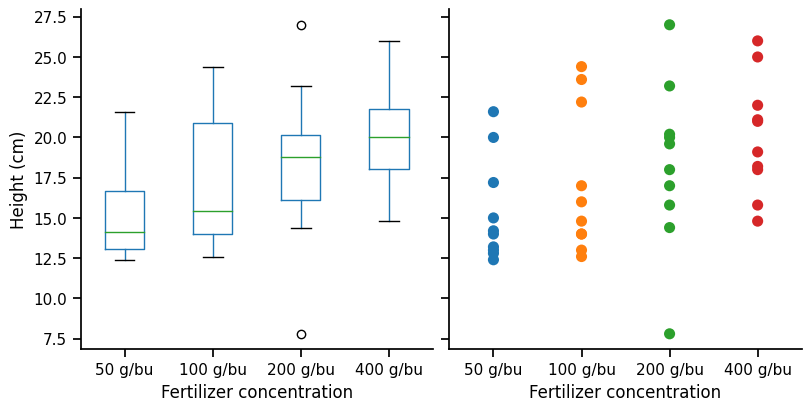

In [6]:
# Let us make two plots: a boxplot and a scatter plot, so set up two columns:
fig, (axbox, axscat) = plt.subplots(
    constrained_layout=True,
    ncols=2,
    figsize=(8, 4),
    sharey=True,
)
# Pandas has a function to make a boxplot
data.boxplot(ax=axbox, grid=False)
axbox.set(xlabel="Fertilizer concentration", ylabel="Height (cm)")

# To make a scatter plot, we use the example code:
sns.stripplot(data=data, jitter=False, ax=axscat, s=8)
axscat.set(xlabel="Fertilizer concentration", ylabel="Height (cm)")
# Note - matplotlib figures out that we only need the ylabel in the left plot
# since the two axes share y.
sns.despine(fig=fig)

#### Your answer to question 2.2(b):
The raw data is plotted by the code above.
From this, it might look like the height increases
slightly, when we increase the concentration of fertilizer. So from
this plot alone, we could start to doubt our null hypothesis that all
means are equal.

### 2.2(c)
In connection with performing ANOVA, we need to calculate some
terms that measure the variance within groups and the variance
between groups.
Calculate these terms ($SST$, $SSA$, and $SSE$).

In [7]:
import numpy as np  # Import numpy for matrix manipulation
data_mat = data.to_numpy()  # Convert the raw data to a numpy matrix
# SST
(rows, columns) = data.shape
# Total variance of the data
mean = np.average(data_mat)
SST = np.sum((data_mat - mean) ** 2)

# SSA Variance between each columns and the mean * rows
c_means = np.average(data_mat, axis=0)
SSA = rows * np.sum((c_means - mean) ** 2)

SSE = SST - SSA

print(f"SST = {SST:.3f}", f"\nSSA = {SSA:.3f}", f"\nSSE = {SSE:.3f}")

SST = 758.035 
SSA = 119.787 
SSE = 638.248


### 2.2(d)
Using the terms you calculated in the previous point, obtain
the two estimates for the variance:

* (i)  $s_1^2 = \frac{SSA}{k-1}$,

* (ii)  $s^2 = \frac{SSE}{k(n-1)}$,


and calculate the $f$-statistic: $f=s_1^2/s^2$.

In [8]:
s12 = SSA / (columns - 1)
s2 = SSE / (columns * (rows - 1))
f = s12 / s2

print(f"(s₁)² = {s12:.3f}")
print(f"s² = {s2:.3f}")
print(f"f = {f:.3f}")

(s₁)² = 39.929
s² = 17.729
f = 2.252


### 2.2(e)
To perform the actual hypothesis test, we need the critical value
from the $F$-distribution. For a specified significance level, $\alpha$,
and with $3$ and $36$ degrees of freedom, we
label the critical value as $f_{\alpha}(3, 36)$. Check that I am using
the correct degrees of freedom here, consistent with the
raw data given in table 1.

#### Your answer to question 2.2(e):
The two degrees of freedom are
* $k-1 = 4 - 1 = 3$; number of columns - 1
* $k(n-1) = 4(10-1) = 36$; number of columns times (number of rows - 1) 

### 2.2(f)
Critical $f$ values can be calculated from the distribution
function(With Python, this can be done with
[`scipy.stats.f.ppf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html)
from the
[SciPy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html).)
or it can be found in statistical tables.(One such table can be found
[here on-line](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3673.htm).)
For the significance levels $\alpha=0.05$ and $\alpha=0.10$, I have found the
following two values:

* (i)  $f_{\alpha = 0.05}(3, 36) = 2.866$

* (ii)  $f_{\alpha=0.10}(3, 36) = 2.243$


Check that these two values are correct.

In [9]:
import scipy.stats

alpha = 0.05
f_5 = scipy.stats.f.ppf(1 - alpha, columns - 1, columns * (rows - 1))
alpha = 0.10
f_10 = scipy.stats.f.ppf(1 - alpha, columns - 1, columns * (rows - 1))


print(f"α = 0.05: f({columns-1}, {columns*(rows-1)}) = {f_5:.3f}")
print(f"α = 0.10: f({columns-1}, {columns*(rows-1)}) = {f_10:.3f}")

α = 0.05: f(3, 36) = 2.866
α = 0.10: f(3, 36) = 2.243


#### Your answer to question 2.2(f):
The code above gives values which are close enough to the given values. 
So we assume that the given values are correct.

### 2.2(g)
Based on the calculations you have done,
can you conclude on the $0.05$ level of significance that
different concentrations of the fertilizer affect the mean attained height
of the plants? What concentration, if any, appears to give the tallest plants?

#### Your answer to question 2.2(g):
Our calculated $f$-statistic was $2.252$. This value is smaller than the
critical one: $2.252 < f_{\alpha = 0.05}(3, 36) = 2.866$. 
We will then **not** reject the null hypothesis and we
conclude that the means are **not** different in this case. We will then
recommend using the lowest concentration as this will probably be cheaper.

The code below calculates the probability of observing the data we
have (or more extreme) given that the null hypothesis is true. This
value is close to $10$\%. Although the figure made by question **2.2 (b)** indicate that
there might be a weak effect when increasing the fertilizer concentration, our
test tells us that the probability of observing this by chance is almost $10$\%, even when the means are the same.

In [10]:
p = 1 - scipy.stats.f.cdf(f, columns - 1, columns * (rows - 1)) 
print(f"p = {p:.4f}")

p = 0.0989


### 2.2(h)
Would your conclusion change with a significance level of $0.10$?

#### Your answer to question 2.2(h):
If we select a significance level of $0.10$, the critical $f$-value is $2.243$, which
is **smaller** than the observed $f$-value: $2.252 > 2.243$. In this
case, we will **reject** the
null hypothesis and we find that there is an effect when increasing the
fertilizer concentration. 

In a real-life situation, we would probably still
be skeptical about rejecting the null hypothesis as the effect of increasing
the fertilizer concentration seems to be modest, and since we now have a $10$\%
chance of falsely rejecting the null hypothesis.

### 2.2(i)
(Optional) Re-do this exercise, but use the [anova_lm](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova\_lm.html) method
from the Python package [statsmodels](https://www.statsmodels.org), or the
[scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f\_oneway.html) method from the Python package [SciPy](https://www.scipy.org/), to run ANOVA.

Let us do SciPy first. Here, we do not have to calculate the SST, SSA, and SSE:

In [11]:
# Let us check the results using SciPy. Scipy wants the columns so we give it that:
columns_mat = data_mat.T  # Do one column at a time instead of a row
fval, pval = scipy.stats.f_oneway(*columns_mat)
# The "*" here gives each row of columns_mat as a unique input to the function
print("SciPy results:")
print(f"f = {fval}")
print(f"p = {pval}")

SciPy results:
f = 2.2521715696719777
p = 0.09893276872587471


We then check with statsmodels. For statsmodels, we first have to reorganize the data:

In [12]:
data_melt = pd.melt(
    data.reset_index(), id_vars=["index"], value_vars=data.columns
)
data_melt

,index,variable,value
0,0,50 g/bu,13.2
1,1,50 g/bu,12.4
2,2,50 g/bu,12.8
3,3,50 g/bu,17.2
4,4,50 g/bu,13.0
5,5,50 g/bu,14.0
6,6,50 g/bu,14.2
7,7,50 g/bu,21.6
8,8,50 g/bu,15.0
9,9,50 g/bu,20.0


In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("value ~ C(variable)", data=data_melt).fit()
table = sm.stats.anova_lm(model, typ=2)
print("Statsmodels results:")
table

Statsmodels results:


,sum_sq,df,F,PR(>F)
C(variable),119.787,3.0,2.252172,0.098933
Residual,638.248,36.0,NaN,NaN


#### Your answer to question 2.2(i):
Both codes above gives a similar answer to the one we found.